# <center>Tato studijní pomůcka vznikla za podpory Inovačního projektu FSv ČVUT č. 15 "Inovativní pomůcky pro předměty Přetváření a porušování materiálů".</center>
<center>(c) 2024 Lenka Dohnalová <i>(lenka.dohnalova@fsv.cvut.cz)</i>, Petr Havlásek <i>(petr.havlasek@cvut.cz)</i>, Milan Jirásek <i>(milan.jirasek@cvut.cz)</i></center>

***
# Mezní plastická analýza - kinematická metoda

## Zadání
  Vyšetřete mezní plastický stav nosníku na obrázku využitím kinematické metody. Nosník má konstantní obdélníkový průřez o rozměrech $B = 300$ mm a $H = 420$ mm a je vyroben z ideálně pružnoplastického materiálu s mezí kluzu $\sigma_0 = 270$ MPa. Referenční hodnoty působících sil jsou $F_1 = 30$ kN a $F_2 = 18$ kN. Délky jednotlivých úseků nosníku jsou uvedeny na obrázku.

  Nejprve určete mezní plastický moment. Proveďte analýzu všech kinematicky přípustných mechanismů.
  Určete hodnotu součinitele $\mu$ v mezním plastickém stavu konstrukce a vykreslete odpovídající průběhy momentů a posouvajících sil.

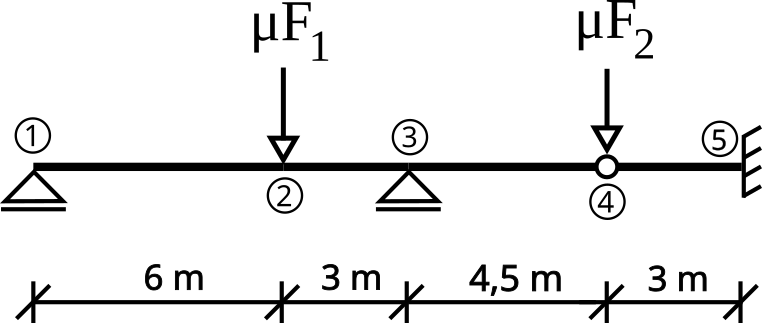

In [128]:
from IPython.display import display, Image
display(Image(filename="Nosnik_kinem_metoda_zadani.png", width=400))

Import potřebných knihoven

In [129]:
%matplotlib inline

import math
import numpy as np

from IPython.display import Markdown as md

import matplotlib.pyplot as plt

#!pip install sympy
from sympy import *
import sympy as smp

import matplotlib.patches as patches

# Nastavení přesnosti na 3 desetinná místa
np.set_printoptions(precision=3, suppress=True)

## Řešení

Definice proměnných a jejich hodnot:

In [130]:
B = smp.symbols('B', real = True, positive = True)
H = smp.symbols('H', real = True, positive = True)
# I = smp.symbols('I', real = True, positive = True)

mu = smp.symbols('\mu', real = True)
F1 = smp.symbols('F1', real = True)
F2 = smp.symbols('F2', real = True)

sigma0 = smp.symbols('\sigma_0', real = True)

val_B = 0.3
val_H = 0.42
val_F1 = 30000
val_F2 = 18000
val_sigma0 = 270000000

Nejprve určíme hodnotu mezního plastického momentu pro zadaný průřez.

In [131]:
M0 = B * H/2 * H/2 * sigma0
val_M0 = M0.subs([(B, val_B), (H, val_H), (sigma0, val_sigma0)])
print(f"Mezní plastický moment: {val_M0/1000:.3f} kNm")

Mezní plastický moment: 3572.100 kNm


Stupeň statické neurčitosti daného nosníku je 1, pro vznik mechanismu tedy musí dojít k vytvoření dvou plastických kloubů (k vytvoření částečného mechanismu po vzniku jednoho plastického kloubu zde nedojde). Plastické klouby mohou vzniknout v přůřezech číslo 2, 3 a 5. Je proto potřeba vyšetřit 3 varianty (kombinace dvou míst ze tří možných).
Varianta A - vznik kloubu v průřezech 2 a 3,
varianta B - vznik kloubu v průřezech 2 a 5,
varianta C - vznik kloubu v průřezech 3 a 5.

Pro každý z mechanismů určíme hodnotu součinitele $\mu$ z rovnosti výkonu vnějších sil a disipačního výkonu $P_{ext} = D_{int}$.

### Varianta A - vznik kloubu v průřezech 2 a 3

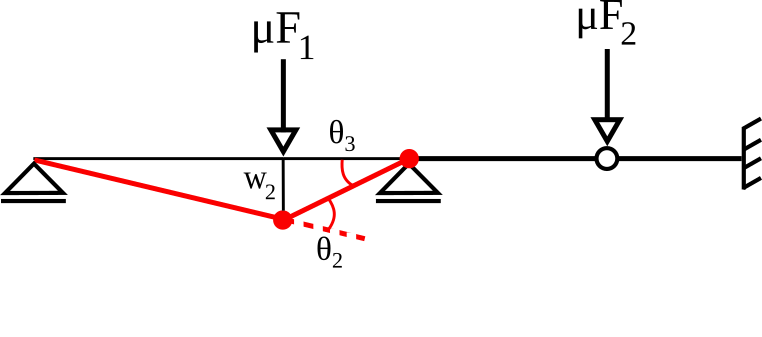

In [132]:
from IPython.display import display, Image
display(Image(filename="Nosnik_kinem_metoda_A.png", width=400))

Na obrázku je znázorněn kinematický mechnismus pro vznik plastických kloubů v místech 2 a 3.
V tomto případě do výkonu vnějších sil přispívá pouze síla $F_1$, síla $F_2$ pracuje na nulovém posunu.
$P_{ext} = \mu F_1 \cdot \dot{w}_2$

Dále vyjádříme disipační výkon (místa, kde dochází k disipaci jsou pro přehlednost vyznačena červeným obloučkem).
$W_{int} = M_0 \cdot (\dot{\theta}_2 + \dot{\theta}_3) = M_0 \cdot (\dot{\theta}_1 + \dot{\theta}_3 + \dot{\theta}_3) = M_0 \cdot (\dot{w}_2/6 + \dot{w}_2/3 + \dot{w}_2/3) = M_0 \cdot 5\dot{w}_2/6$

Z rovnosti $P_{ext} = D_{int}$ dostáváme hodnotu součinitele pro variantu A:

$\mu F_1 = 5 M_0/6$

$\mu_A = \frac{5 M_0}{6 F_1}$

In [133]:
val_mu_A = 5*val_M0/(6*val_F1)
print(f"Součinitel zatížení pro variantu A: {val_mu_A:.3f} ")

Součinitel zatížení pro variantu A: 99.225 


### Varianta B - vznik kloubu v průřezech 2 a 5

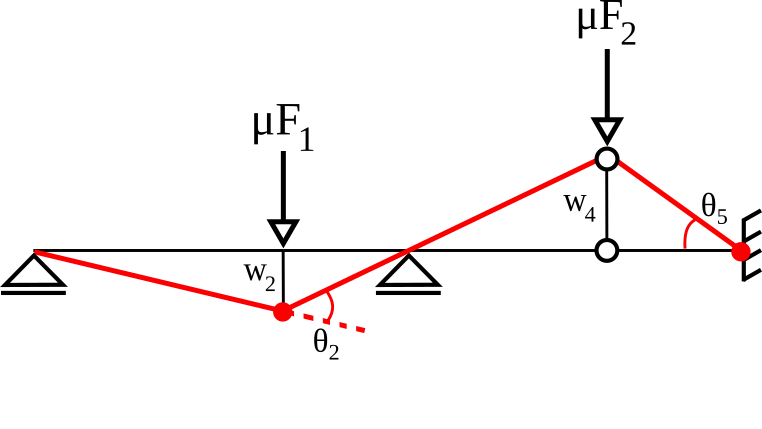

In [134]:
from IPython.display import display, Image
display(Image(filename="Nosnik_kinem_metoda_B.png", width=400))

Opět vyjádříme výkon vnějších sil a disipační výkon pro znázorněný mechanismus. Síla $F_2$ v tomto případě podává záporný výkon.

$P_{ext} = \mu F_1 \cdot \dot{w}_2 - \mu F_2 \cdot \dot{w}_4 = \mu F_1 \cdot \dot{w}_2 - \mu F_2 \cdot \dot{w}_2 \cdot 4,\!5/3 = \mu F_1 \cdot \dot{w}_2 - 1,\!5 \mu F_2 \cdot \dot{w}_2 = \mu \cdot \dot{w}_2 \cdot (F_1 - 1,\!5 F_2)$

Dále vyjádříme disipační výkon (místa, kde dochází k disipaci jsou pro přehlednost vyznačena červeným obloučkem).
$W_{int} = M_0 \cdot (\dot{\theta}_2 + \dot{\theta}_5) = M_0 \cdot (\dot{\theta}_1 + \dot{\theta}_3 + \dot{\theta}_5) = M_0 \cdot (\dot{w}_2/6 + \dot{w}_2/3 + \dot{w}_4/3) = M_0 \cdot (\dot{w}_2/6 + \dot{w}_2/3 + 1,\!5 \dot{w}_2/3) = M_0 \cdot \dot{w}_2$

Z rovnosti $P_{ext} = D_{int}$ dostáváme hodnotu součinitele pro variantu B:

$\mu \cdot (F_1 - 1,\!5 F_2) = M_0$

$\mu_A = \frac{M_0}{F_1 - 1,5 F_2}$

\\

*Poznámka: Připomeňme důležitou podmínku, že vnější síly musí podávat kladný výkon. V případě mechanismů, kde některá ze sil pracuje na záporném posunu, není vždy jasné jak mechanismus kolapsu zvolit, navíc z obecného vyjádření nemusí být výsledné znaménko u výkonu vnějších sil zřejmé. V případě špatného předpokladu mechanismu kolapsu získáme zápornou hodnotu součinitele zatížení. V takovém případě se jedná o nepřípustný mechanismus kolapsu a je nutné původní předpoklad opravit, jednotlivé posuny zvolit opačným směrem. Změna se ale samozřejmě projeví pouze ve znaménku, není proto nutné celý výpočet provádět znovu.*

In [135]:
val_mu_B = val_M0/(val_F1 - 1.5*val_F2)
print(f"Součinitel zatížení pro variantu B: {val_mu_B:.3f} ")

Součinitel zatížení pro variantu B: 1190.700 


### Varianta C - vznik kloubu v průřezech 3 a 5

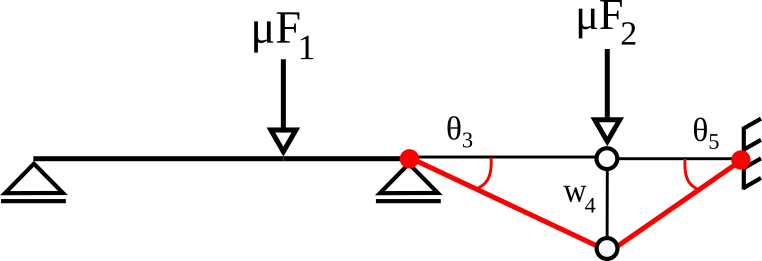

In [136]:
from IPython.display import display, Image
display(Image(filename="Nosnik_kinem_metoda_C.png", width=400))

Opět vyjádříme výkon vnějších sil a disipační výkon pro znázorněný mechanismus. Síla $F_1$ v tomto případě podává nulový výkon (pracuje na nulovém posunu).

$P_{ext} = \mu F_2 \cdot \dot{w}_4$

Dále vyjádříme disipační výkon (místa, kde dochází k disipaci jsou pro přehlednost vyznačena červeným obloučkem).
$W_{int} = M_0 \cdot (\dot{\theta}_3 + \dot{\theta}_5) = M_0 \cdot (\dot{w}_4/4,\!5 + \dot{w}_4/3) = \frac{5}{9} \ M_0 \cdot \dot{w}_4$

Z rovnosti $P_{ext} = D_{int}$ dostáváme hodnotu součinitele pro variantu B:

$\mu \cdot F_2 = 5 M_0/9$

$\mu_C = \frac{5 M_0}{9 F_2}$

In [137]:
val_mu_C = 5*val_M0/(9*val_F2)
print(f"Součinitel zatížení pro variantu C: {val_mu_C:.3f} ")

Součinitel zatížení pro variantu C: 110.250 


**Určení rozhodujícího mechanismu:**

Skutečný machanismus kolapsu bude ten, ke kterému dojde při nejmenším zatížení, tedy mechanismus s nejmenší hodnotou součinitele zatížení $\mu$.

In [138]:
# Nalezení minima a rozhodujícího mechanismu
values = {"A": val_mu_A, "B": val_mu_B, "C": val_mu_C}
min_mechanism = min(values, key=values.get)
val_mu = values[min_mechanism]

# Výstup
print(f"Rozhodující je mechanismus {min_mechanism} s hodnotou μ = {val_mu:.3f}.")

# Mezní hodnoty zatížení
print(f"Mezní hodnota síly F_1 je {val_mu*val_F1/1000:.3f} kN.")
print(f"Mezní hodnota síly F_2 je {val_mu*val_F2/1000:.3f} kN.")

Rozhodující je mechanismus A s hodnotou μ = 99.225.
Mezní hodnota síly F_1 je 2976.750 kN.
Mezní hodnota síly F_2 je 1786.050 kN.


**Dopočet vnitřních sil a momentů pro mezní plastický stav**

Při vykreslování průběhů vnitřních sil a momentů je vhodné využít toho, že známe hodnotu momentu v místech vzniku plastických kloubů.

$M_2 = M_0$

$M_4 = M_0$

Ostatní hodnoty momentů a posouvajících sil pak dopočteme obvyklým způsobem z podmínek rovnováhy.
Kladnou orientaci svislých reakcí uvažujeme zdola nahoru, kladný moment pro tažená spodní vlákna.

In [139]:
# známé hodnoty momentů
val_M2 = val_M0
print(f"Moment M2: {val_M2/1000:.3f} kNm")
val_M3 = -val_M0
print(f"Moment M3: {val_M3/1000:.3f} kNm")
val_M1 = 0
print(f"Moment M1: {val_M1/1000:.3f} kNm")
val_M4 = 0
print(f"Moment M4: {val_M4/1000:.3f} kNm")

# svislá reakce v průřezu 1:
val_R1 = val_M2 / 6
print(f"Svislá reakce v levé podpoře: {val_R1/1000:.3f} kN")

# svislá reakce v průřezu 3 (z momentové podmínky k bodu 4 zleva):
val_R3 = (-val_R1*13.5 + val_mu*val_F1*7.5) / 4.5
print(f"Svislá reakce ve střední podpoře: {val_R3/1000:.3f} kN")

# svislá reakce v průřezu 5:
val_R5 = -val_R1 - val_R3 + val_mu*val_F1 + val_mu*val_F2
print(f"Svislá reakce ve vetknutí: {val_R5/1000:.3f} kN")

# moment ve vetknutí:
val_M5 = -val_R5*3
print(f"Moment M5 ve vetknutí: {val_M5/1000:.3f} kNm")

# hodnoty posouvajících sil:
val_V12 = val_R1
val_V21 = val_V12
val_V23 = val_R1 - val_mu*val_F1
val_V32 = val_V23
val_V34 = val_V23 + val_R3
val_V43 = val_V34
val_V45 = val_V43 - val_mu*val_F2
val_V54 = val_V45
# kontrola
if abs(val_V54 + val_R5) < 1e-6:  # Používáme toleranci kvůli zaokrouhlovacím chybám
    print("Kontrola výpočtu posouvajících sil je v pořádku.")
else:
    print(f"Vypočtená hodnota posouvající síly V54 ({val_V54}) neodpovídá hodnotě svislé reakce ve vetknutí ({val_R5}).")


Moment M2: 3572.100 kNm
Moment M3: -3572.100 kNm
Moment M1: 0.000 kNm
Moment M4: 0.000 kNm
Svislá reakce v levé podpoře: 595.350 kN
Svislá reakce ve střední podpoře: 3175.200 kN
Svislá reakce ve vetknutí: 992.250 kN
Moment M5 ve vetknutí: -2976.750 kNm
Kontrola výpočtu posouvajících sil je v pořádku.


**Vykreslení průběhu momentů**

In [140]:
# Délky jednotlivých částí
lengths = [6, 3, 4.5, 3]  # délky mezi styčníky

# Souřadnice styčníků (x-ové hodnoty)
x_positions = [0]
for length in lengths:
    x_positions.append(x_positions[-1] + length)

# Hodnoty momentů ve styčnících [kNm]
M_values = [val_M1/1000, val_M2/1000, val_M3/1000, val_M4/1000, val_M5/1000]

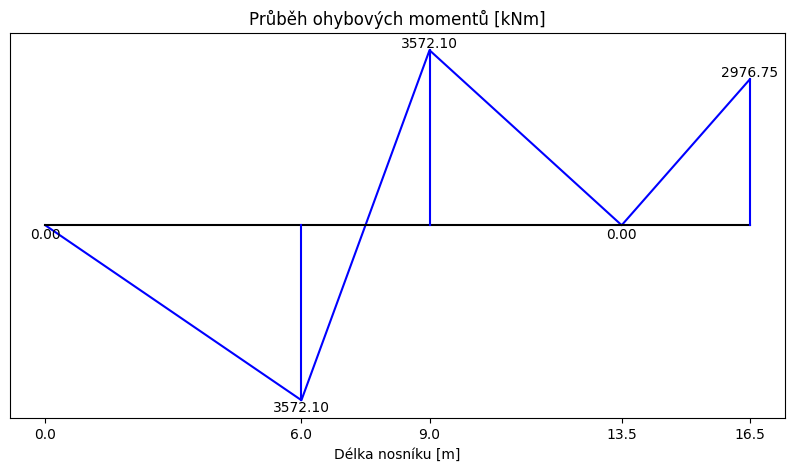

In [141]:
# Vykreslení ohybových momentů
plt.figure(figsize=(10, 5))

# Vykreslení průběhu momentů
plt.plot(x_positions, M_values, color='blue', linestyle='-')

# Vykreslení nosníku černě plnou čarou
plt.plot([x_positions[0], x_positions[-1]], [0, 0], color='black', linewidth=1.5)

# Přidání hodnot v místech styčníků
for x, y in zip(x_positions, M_values):
    # Vypisujeme absolutní hodnotu (bez znaménka)
    if y != 0:
        plt.text(x, y, f"{abs(y):.2f}", fontsize=10, ha='center', va='top' if y > 0 else 'bottom')
    else:
        # Posunutí textu pro nulovou hodnotu
        plt.text(x, y + 50, f"{abs(y):.2f}", fontsize=10, ha='center', va='top', verticalalignment='top')

# Svislé spojnice pro všechny styčníky s osou X
for i, y in enumerate(M_values):
    plt.plot([x_positions[i], x_positions[i]], [0, y], color='blue', linestyle='-')

# Titulek a popisky
plt.title('Průběh ohybových momentů [kNm]')
plt.xlabel('Délka nosníku [m]')

# Odstranění zobrazení svislé osy
plt.gca().yaxis.set_ticks([])  # Odstranění čárek
plt.gca().yaxis.set_ticklabels([])  # Odstranění hodnot

# Volba orientace osy y (kladná poloosa dolů - spodní vlákna)
plt.gca().invert_yaxis()

# Nastavení popisků na ose x v místech styčníků
plt.xticks(x_positions)

# Zobrazení grafu
plt.show()


**Vykreslení průběhu posouvajících sil**

In [142]:
# Hodnoty posouvajících sil [kN]
V_values = [
    val_V12 / 1000, val_V21 / 1000, val_V23 / 1000, val_V32 / 1000, val_V34 / 1000,
    val_V43 / 1000, val_V45 / 1000, val_V54 / 1000
]


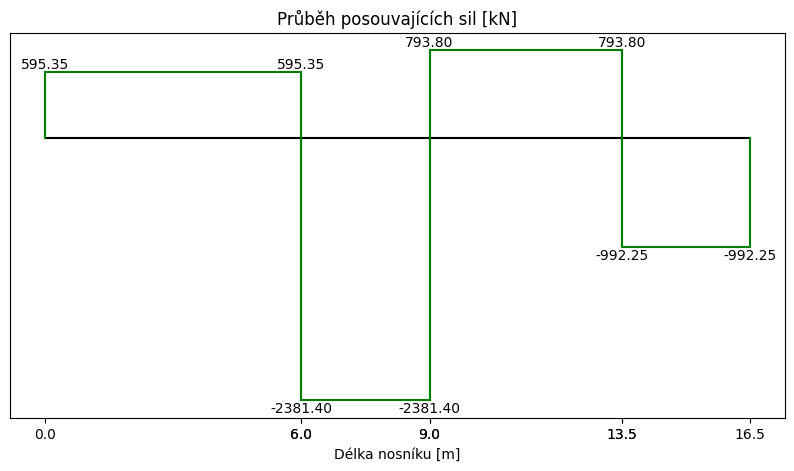

In [143]:
# Délky jednotlivých částí
lengths = [6, 3, 4.5, 3]  # délky mezi styčníky

# Souřadnice styčníků (x-ové hodnoty)
x_positions = []
for i, length in enumerate(lengths):
    x_positions.append(sum(lengths[:i]))  # Levá hodnota pro styčník
    x_positions.append(sum(lengths[:i + 1]))  # Pravá hodnota pro styčník
# vytvoří vektor pro vykreslení hodnot zleva i zprava, zjednodušeně by bylo možné přímo definovat: x_positions = [0, 6, 6, 9, 9, 13.5, 13.5, 16.5]

# Hodnoty posouvajících sil pro jednotlivé styčníky [kN]
V_values = [val_V12 / 1000, val_V21 / 1000, val_V23 / 1000, val_V32 / 1000, val_V34 / 1000, val_V43 / 1000, val_V45 / 1000, val_V54 / 1000]

# Vykreslení posouvajících sil
plt.figure(figsize=(10, 5))

# Vykreslení průběhu posouvajících sil (konstantní úseky)
plt.plot(x_positions, V_values, color='green', linestyle='-')

# Vykreslení nosníku černě plnou čarou
plt.plot([x_positions[0], x_positions[-1]], [0, 0], color='black', linewidth=1.5)

# Přidání hodnot ve styčnících
for x, y in zip(x_positions, V_values):
    plt.text(x, y + (10 if y > 0 else -10), f"{y:.2f}", fontsize=10, ha='center', va='bottom' if y > 0 else 'top')

# Svislé spojnice pro všechny styčníky s osou X
for i, y in enumerate(V_values):
    plt.plot([x_positions[i], x_positions[i]], [0, y], color='green', linestyle='-')

# Titulek a popisky
plt.title('Průběh posouvajících sil [kN]')
plt.xlabel('Délka nosníku [m]')

# Odstranění zobrazení svislé osy
plt.gca().yaxis.set_ticks([])  # Odstranění čárek
plt.gca().yaxis.set_ticklabels([])  # Odstranění hodnot

# Nastavení popisků na ose x v místech styčníků
plt.xticks(x_positions)

# Zobrazení grafu
plt.show()
